# kc_housing_analysis

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
%matplotlib inline

## Load data and check data format

In [3]:
housing_df = pd.read_csv('kc_house_data.csv')

In [4]:
housing_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [5]:
housing_df.shape

(21597, 21)

In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [7]:
column_list = list(housing_df.columns)
# housing_df['waterfront'].unique()
unique_value_of_each_column = list(map(lambda x:housing_df[x].unique(), column_list))
unique_value_of_each_column

[array([7129300520, 6414100192, 5631500400, ..., 1523300141,  291310100,
        1523300157]),
 array(['10/13/2014', '12/9/2014', '2/25/2015', '2/18/2015', '5/12/2014',
        '6/27/2014', '1/15/2015', '4/15/2015', '3/12/2015', '4/3/2015',
        '5/27/2014', '5/28/2014', '10/7/2014', '1/24/2015', '7/31/2014',
        '5/29/2014', '12/5/2014', '4/24/2015', '5/14/2014', '8/26/2014',
        '7/3/2014', '5/16/2014', '11/20/2014', '11/3/2014', '6/26/2014',
        '12/1/2014', '6/24/2014', '3/2/2015', '11/10/2014', '12/3/2014',
        '6/13/2014', '12/30/2014', '2/13/2015', '6/20/2014', '7/15/2014',
        '8/11/2014', '7/7/2014', '10/28/2014', '7/29/2014', '7/18/2014',
        '3/25/2015', '7/16/2014', '4/28/2015', '3/11/2015', '9/16/2014',
        '2/17/2015', '12/31/2014', '2/5/2015', '3/3/2015', '8/19/2014',
        '4/7/2015', '8/27/2014', '2/23/2015', '12/10/2014', '8/28/2014',
        '10/21/2014', '12/7/2014', '6/3/2014', '9/9/2014', '10/9/2014',
        '8/25/2014', '6/12/201

## Data cleaning

In [8]:
housing_df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [9]:
housing_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Replace missing values with median

In [10]:
list_missing_value_columns = ['waterfront', 'view', 'yr_renovated']
list_missing_value_columns

for value in list_missing_value_columns:
    median_value = housing_df[value].median()
    housing_df[value].fillna(median_value, inplace=True)
housing_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
# double check if anything is missing
housing_df.isna().any().any()

False

### Check duplicates

In [12]:
# check duplicate ID
duplicates = housing_df[housing_df.duplicated(subset='id')]
duplicates.shape

(177, 21)

In [13]:
# drop duplicate names
housing_df.drop_duplicates(subset='id', inplace=True)
# check again
duplicates = housing_df[housing_df.duplicated(subset='id')]
duplicates.shape

(0, 21)

In [14]:
# Reset index values
housing_df.reset_index(drop=True, inplace=True)

In [15]:
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


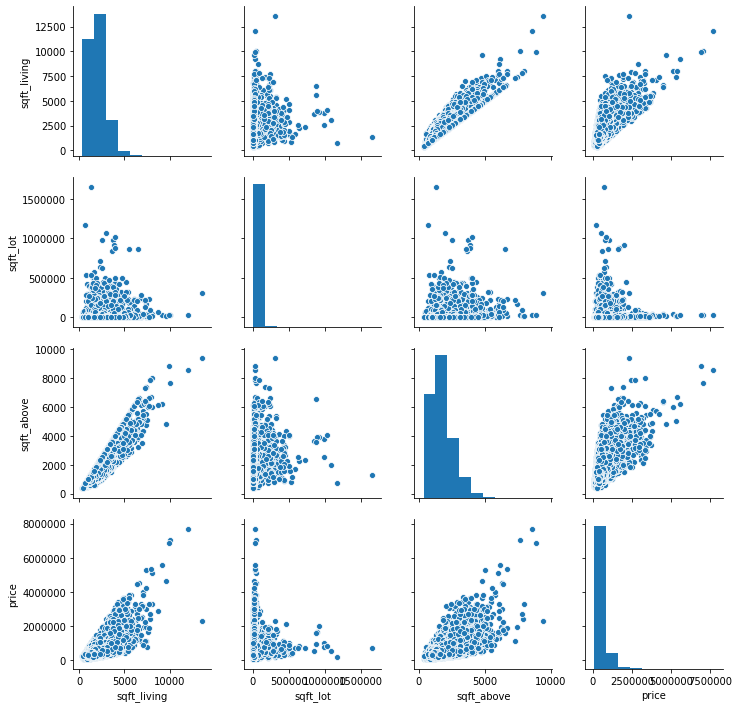

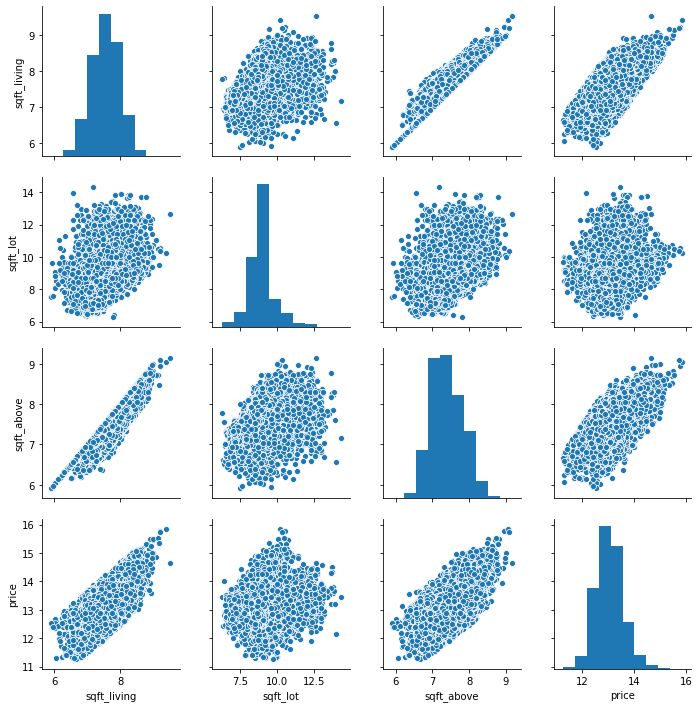

In [16]:
### Check if it's normally distributed
x_cols = ['sqft_living', 'sqft_lot','sqft_above','sqft_basement','price']
sns.pairplot(housing_df[x_cols])
### Log transformation
non_normal = ['sqft_living', 'sqft_lot', 'sqft_above', 'price']
for variable in non_normal:
    housing_df[variable] = housing_df[variable].map(lambda x: np.log(x))
sns.pairplot(housing_df[x_cols])

**Question: Is the size of your house more valuable in higher priced zipcodes**
- Create a new variable called 'meanzip' which takes the average of all the house prices for each zipcode
- Look at the value of having a relatively bigger house changes in importance between low prices vs high priced zipcodes

**Create a zipcode variable**

In [17]:
zips = housing_df['zipcode'].value_counts().index
mean_of_zips = {}
for z in zips:
    ziphouses = housing_df[housing_df['zipcode'] == z]['price']
    mean_of_zips[z] = ziphouses.mean()

In [18]:
housing_df['meanzip'] = housing_df['zipcode'].map(lambda x: (mean_of_zips[x]) )

**Find which variable has the highest correlation with Price**

In [19]:
f = 'price~sqft_living'
model = smf.ols(formula=f, data=housing_df).fit()
print ('The R^2 value for',f,'is', round(model.rsquared,3))

f = 'price~grade'
model = smf.ols(formula=f, data=housing_df).fit()
print ('The R^2 value for',f,'is', round(model.rsquared,3))

f = 'price~meanzip'
model = smf.ols(formula=f, data=housing_df).fit()
print ('The R^2 value for',f,'is', round(model.rsquared,3))


The R^2 value for price~sqft_living is 0.455
The R^2 value for price~grade is 0.496
The R^2 value for price~meanzip is 0.529


From this we can see that **Sqft_living**, **Grade** and **Meanzip** explain the highest percentage of the variation in Price. 
From this information we can test if sqft_living changes when you move through house price zipocde.

We will next test if sqft_living and grade explains the price in low priced zipocdes and high priced zipcodes.

**Sqft_living and Grade in Low Priced Zipcodes**

In [20]:
bottom_ten_percent_zipcodes = np.percentile(housing_df['meanzip'],10)
cheap_houses = housing_df.loc[housing_df['meanzip'] < bottom_ten_percent_zipcodes]
print("There are", len(cheap_houses['meanzip']),
      "houses are from a zipcode with an average price lower than", round(bottom_ten_percent_zipcodes,3), "(log).")


f = 'price~sqft_living'
model = smf.ols(formula=f, data=cheap_houses).fit()
print ('The R^2 value for',f,'is', round(model.rsquared,3))

f = 'price~grade'
model = smf.ols(formula=f, data=cheap_houses).fit()
print ('The R^2 value for',f,'is', round(model.rsquared,3))


There are 1900 houses are from a zipcode with an average price lower than 12.54 (log).
The R^2 value for price~sqft_living is 0.578
The R^2 value for price~grade is 0.43


**Sqft_living and Grade in High Priced Zipcodes**

In [21]:
top_ten_percent_zipcodes = np.percentile(housing_df['meanzip'],90)
expensive_houses = housing_df.loc[housing_df['meanzip'] > top_ten_percent_zipcodes]
print("There are", len(expensive_houses['meanzip']),
      "houses are from a zipcode with an average price higher than", round(top_ten_percent_zipcodes,3), "(log).")

f = 'price~sqft_living'
model = smf.ols(formula=f, data=expensive_houses).fit()
print ('The R^2 value for',f,'is', round(model.rsquared,3))

f = 'price~grade'
model = smf.ols(formula=f, data=expensive_houses).fit()
print ('The R^2 value for',f,'is', round(model.rsquared,3))

There are 1708 houses are from a zipcode with an average price higher than 13.559 (log).
The R^2 value for price~sqft_living is 0.686
The R^2 value for price~grade is 0.57


In [22]:
bottom_ninety_percent_zipcodes = np.percentile(housing_df['meanzip'],90)
all_cheap_houses = housing_df.loc[housing_df['meanzip'] < bottom_ninety_percent_zipcodes]

**So it seems that houses in higher priced zipcodes are substantially affected by the size of the house.**
Now lets plot individual zipcodes on a scatter graph.

Zipcode: 98112


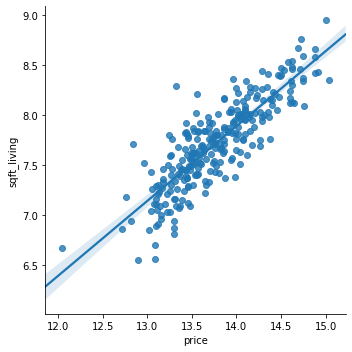

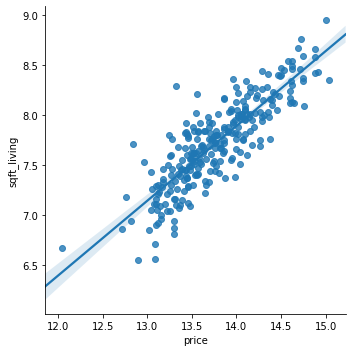

Zipcode: 98119


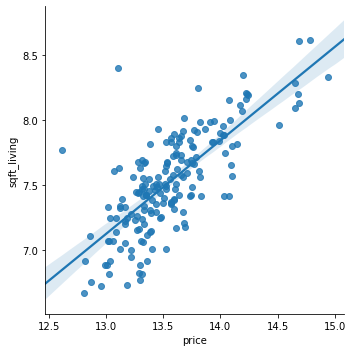

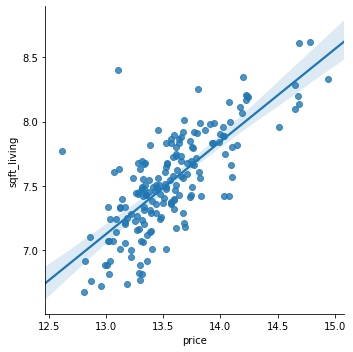

Zipcode: 98004


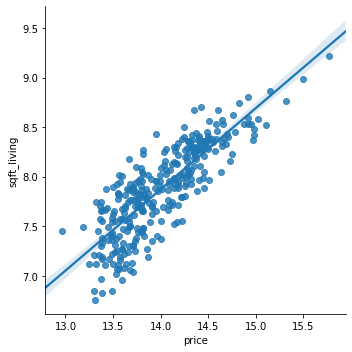

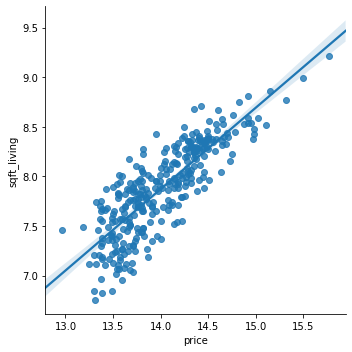

Zipcode: 98005


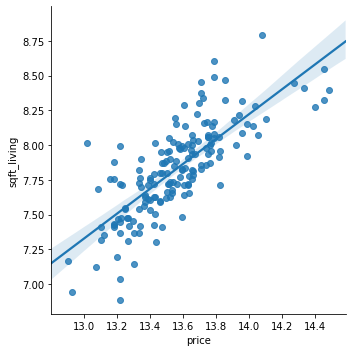

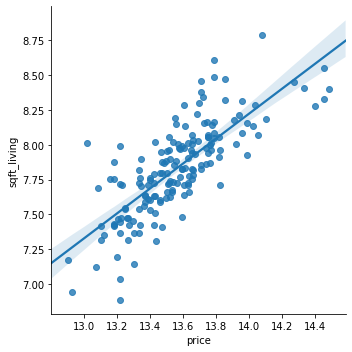

Zipcode: 98102


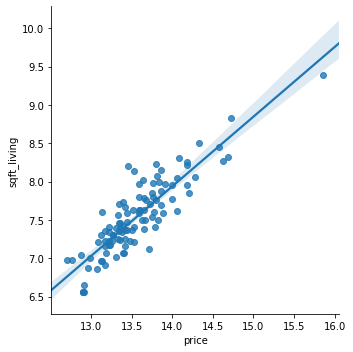

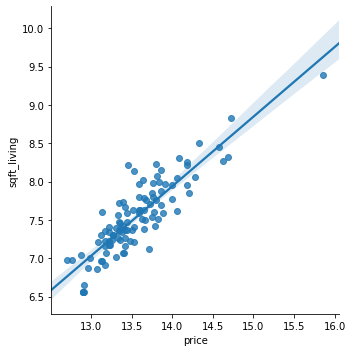

Zipcode: 98039


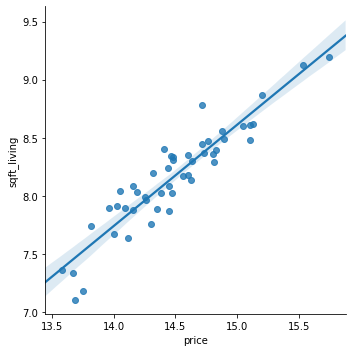

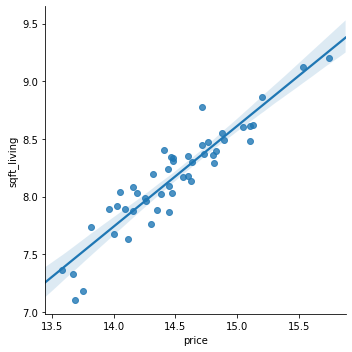

Zipcode: 98040


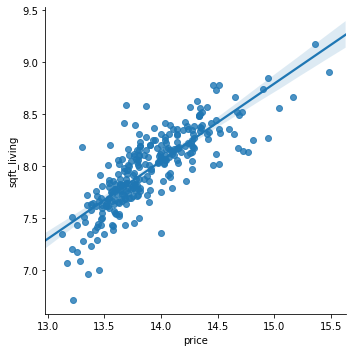

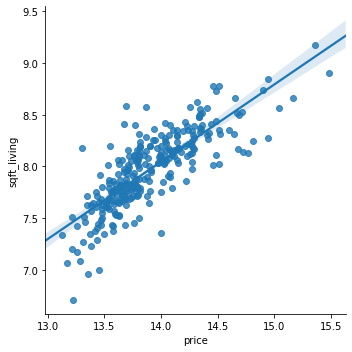

Zipcode: 98105


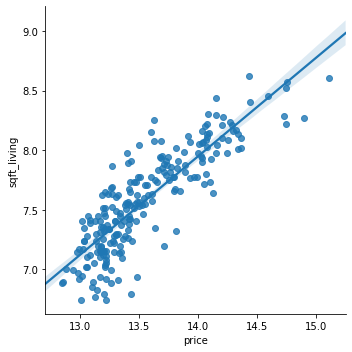

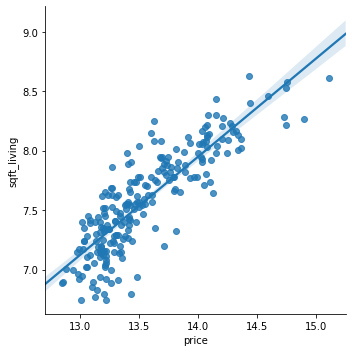

Zipcode: 98109


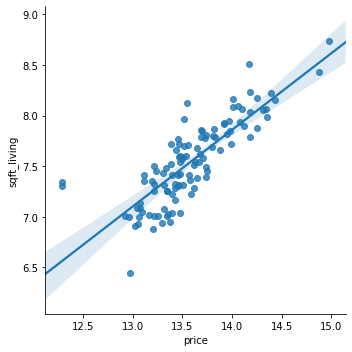

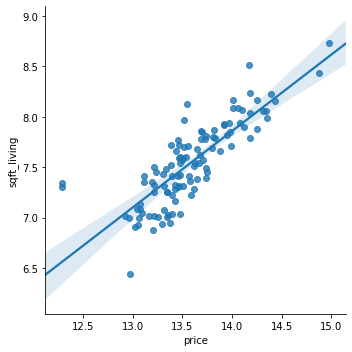

In [151]:
exp_zipcodes = list(set(expensive_houses['zipcode']))

numbers = list(range(0, len(exp_zipcodes)))
new_list = []
for num in numbers:
    zipc = expensive_houses.loc[expensive_houses['zipcode'] == exp_zipcodes[num] ]
    sns.lmplot(x="price", y="sqft_living", data=zipc)    
    plt.title(print("Zipcode:",exp_zipcodes[num]))
    plt.show(fig)

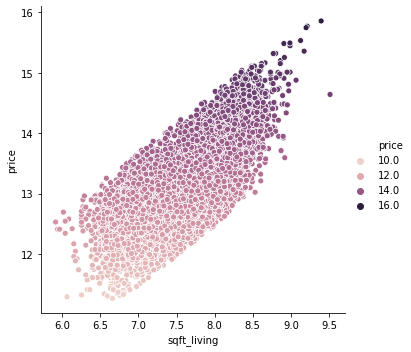

In [39]:
sns.relplot(y="price", x="sqft_living", hue="price", data=housing_df);

In [47]:
housing_df['Expensive Zipcode'] = housing_df['meanzip'] > top_ten_percent_zipcodes

In [56]:
housing_df.head(50)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,meanzip,NewColumns,Expensive Zipcode
0,7129300520,10/13/2014,12.309982,3,1.00,7.073270,8.639411,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,12.559064,1,False
1,6414100192,12/9/2014,13.195614,3,2.25,7.851661,8.887653,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,12.996822,1,False
2,5631500400,2/25/2015,12.100712,2,1.00,6.646391,9.210340,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,12.998344,1,False
3,2487200875,12/9/2014,13.311329,4,3.00,7.580700,8.517193,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,13.146864,1,False
4,1954400510,2/18/2015,13.142166,3,2.00,7.426549,8.997147,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,13.383292,1,False
5,7237550310,5/12/2014,14.022525,4,4.50,8.597851,11.532042,1.0,0.0,0.0,...,2001,0.0,98053,47.6561,-122.005,4760,101930,13.357530,1,False
6,1321400060,6/27/2014,12.458775,3,2.25,7.447168,8.827468,2.0,0.0,0.0,...,1995,0.0,98003,47.3097,-122.327,2238,6819,12.539642,1,False
7,2008000270,1/15/2015,12.583995,3,1.50,6.966024,9.181015,1.0,0.0,0.0,...,1963,0.0,98198,47.4095,-122.315,1650,9711,12.531322,1,False
8,2414600126,4/15/2015,12.343658,3,1.00,7.484369,8.918650,1.0,0.0,0.0,...,1960,0.0,98146,47.5123,-122.337,1780,8113,12.656804,1,False
9,3793500160,3/12/2015,12.685408,3,2.50,7.544332,8.788746,2.0,0.0,0.0,...,2003,0.0,98038,47.3684,-122.031,2390,7570,12.760982,1,False
